In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data_student.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [4]:
df = df.iloc[:,:-1]
df

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24
...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58
254,0.78,0.61,0.71,0.19,0.60
255,0.54,0.82,0.71,0.29,0.77
256,0.50,0.75,0.81,0.61,0.26


In [5]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

df_scaled = min_max_scaler.fit_transform(df)
df_scaled

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08080808, 0.08888889, 0.10526316, 0.24242424, 0.96774194],
       [0.06060606, 0.06666667, 0.05263158, 0.25252525, 0.35483871],
       ...,
       [0.54545455, 0.91111111, 0.74736842, 0.29292929, 0.82795699],
       [0.50505051, 0.83333333, 0.85263158, 0.61616162, 0.27956989],
       [0.66666667, 1.        , 0.8       , 0.87878788, 0.79569892]])

In [6]:
df = pd.DataFrame(data=df_scaled, columns = df.columns)
df

,STG,SCG,STR,LPR,PEG
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.080808,0.088889,0.105263,0.242424,0.967742
2,0.060606,0.066667,0.052632,0.252525,0.354839
3,0.101010,0.111111,0.157895,0.656566,0.322581
4,0.080808,0.088889,0.084211,0.989899,0.258065
...,...,...,...,...,...
253,0.616162,0.866667,0.726316,0.929293,0.623656
254,0.787879,0.677778,0.747368,0.191919,0.645161
255,0.545455,0.911111,0.747368,0.292929,0.827957
256,0.505051,0.833333,0.852632,0.616162,0.279570


In [7]:
#9 สร้าง Dendrogram ของ ฟีเจอร์ STG กับ PEG เพื่อหาจำนวน Cluster ที่เหมาะสม 
data = df[['STG','PEG']]
data = np.array(data)
data

array([[0.        , 0.        ],
       [0.08080808, 0.96774194],
       [0.06060606, 0.35483871],
       [0.1010101 , 0.32258065],
       [0.08080808, 0.25806452],
       [0.09090909, 0.70967742],
       [0.1010101 , 0.60215054],
       [0.15151515, 0.01075269],
       [0.2020202 , 0.2688172 ],
       [0.        , 0.91397849],
       [0.18181818, 0.87096774],
       [0.06060606, 0.32258065],
       [0.1010101 , 0.3655914 ],
       [0.1010101 , 0.96774194],
       [0.2020202 , 0.64516129],
       [0.12121212, 0.86021505],
       [0.05050505, 0.05376344],
       [0.1010101 , 0.35483871],
       [0.15151515, 0.31182796],
       [0.2020202 , 0.60215054],
       [0.12121212, 0.21505376],
       [0.18181818, 0.70967742],
       [0.1010101 , 0.69892473],
       [0.18181818, 0.30107527],
       [0.06060606, 0.2688172 ],
       [0.09090909, 0.91397849],
       [0.04040404, 0.10752688],
       [0.09090909, 0.2688172 ],
       [0.08080808, 0.60215054],
       [0.15151515, 0.87096774],
       [0.

Text(0, 0.5, 'Euc. distance')

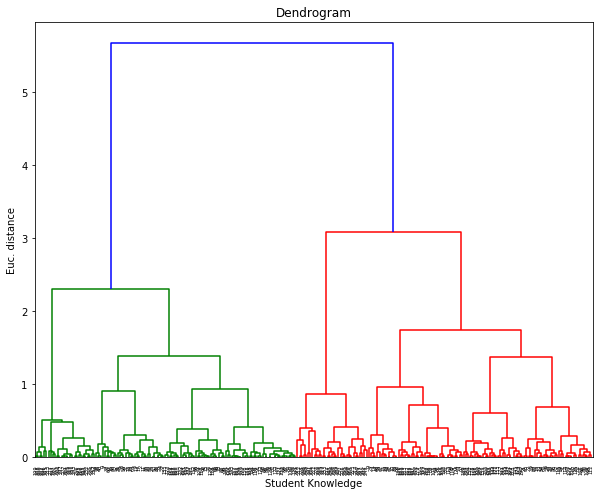

In [8]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Student Knowledge')
plt.ylabel('Euc. distance')

In [9]:
#10 สร้าง Agglomerative Hierarchical Clustering โดยใช้ฟีเจอร์ STG กับ PEG ด้วยจำนวน Cluster ที่เหมาะสม 
# จำนวน cluster ที่เหมาะสม = 2 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2)
y_hc = hc.fit_predict(data)
y_hc

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

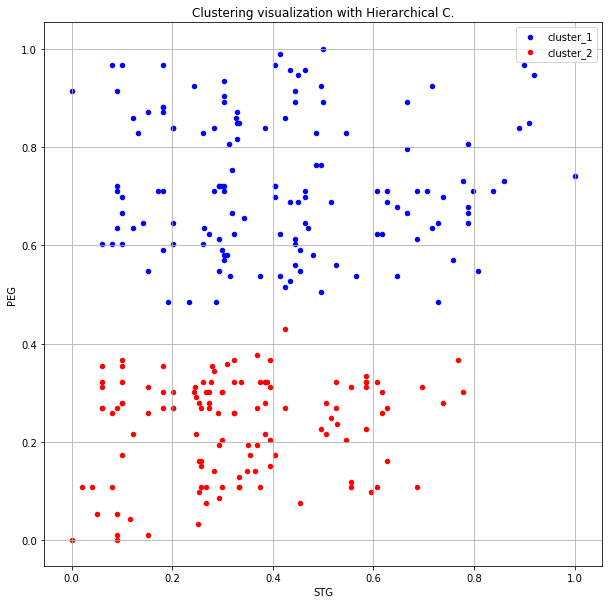

In [10]:
#11 สร้าง Clustering Visualization
x1 = data[y_hc==0][:,0]
y1 = data[y_hc==0][:,1]
x2 = data[y_hc==1][:,0]
y2 = data[y_hc==1][:,1]

plt.figure(figsize=(10,10))
plt.scatter(x1,y1, s=20, c='b', label='cluster_1')
plt.scatter(x2,y2, s=20, c='r', label='cluster_2')
plt.title('Clustering visualization with Hierarchical C.')
plt.xlabel('STG')
plt.ylabel('PEG')
plt.legend()
plt.grid()

In [11]:
#12 เลือกฟีเจอร์ใดก็ได้ 2 ฟีเจอร์ที่ไม่ซ้ำเดิม
data = df[['STR', 'LPR']]
data = np.array(data)
data

array([[0.        , 0.        ],
       [0.10526316, 0.24242424],
       [0.05263158, 0.25252525],
       [0.15789474, 0.65656566],
       [0.08421053, 0.98989899],
       [0.42105263, 0.1010101 ],
       [0.45263158, 0.29292929],
       [0.35789474, 0.4040404 ],
       [0.36842105, 0.72727273],
       [0.52631579, 0.2020202 ],
       [0.57894737, 0.3030303 ],
       [0.53684211, 0.41414141],
       [0.54736842, 0.78787879],
       [0.73684211, 0.15151515],
       [0.73684211, 0.3030303 ],
       [0.78947368, 0.35353535],
       [0.73684211, 0.01010101],
       [0.10526316, 0.08080808],
       [0.05263158, 0.27272727],
       [0.26315789, 0.49494949],
       [0.21052632, 0.78787879],
       [0.38947368, 0.12121212],
       [0.32631579, 0.29292929],
       [0.33684211, 0.42424242],
       [0.36842105, 0.76767677],
       [0.71578947, 0.18181818],
       [0.57894737, 0.25252525],
       [0.63157895, 0.45454545],
       [0.65263158, 0.94949495],
       [0.84210526, 0.21212121],
       [0.

Text(0, 0.5, 'Euc. distance')

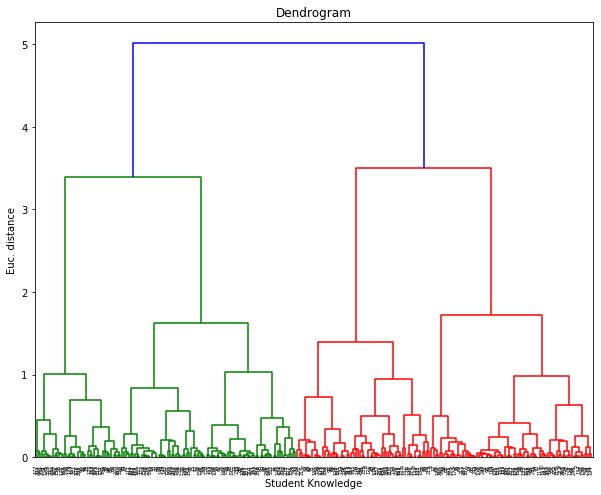

In [13]:
#13 สร้าง Dendrogram ของฟีเจอร์ใหม่
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Student Knowledge')
plt.ylabel('Euc. distance')

In [14]:
#14 สร้าง Agglomerative Hierarchical Clustering ด้วย จำนวน Cluster ที่เหมาะสม โดยใช้ฟีเจอร์ใหม่
# จำนวน cluster ที่เหมาะสม = 4 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4)
y_hc = hc.fit_predict(data)
y_hc

array([0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 1, 1, 3, 1, 1, 3, 3, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 3, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 0,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 1, 3, 1, 1, 1, 3, 3, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 3, 1,
       1, 1, 3, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 3, 1, 1, 3, 3, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 3, 1, 1, 3, 3, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 1, 1, 3, 1, 1, 3, 3, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 3, 1, 1,
       3, 3, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 3, 3, 1, 1, 1, 3, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,
       1, 3, 1, 1, 3, 3, 0, 0, 2, 2, 0, 0, 2, 3, 0, 1, 1, 1, 1, 1, 3, 3,
       0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 3, 1, 1, 3, 3], dtype=int64)

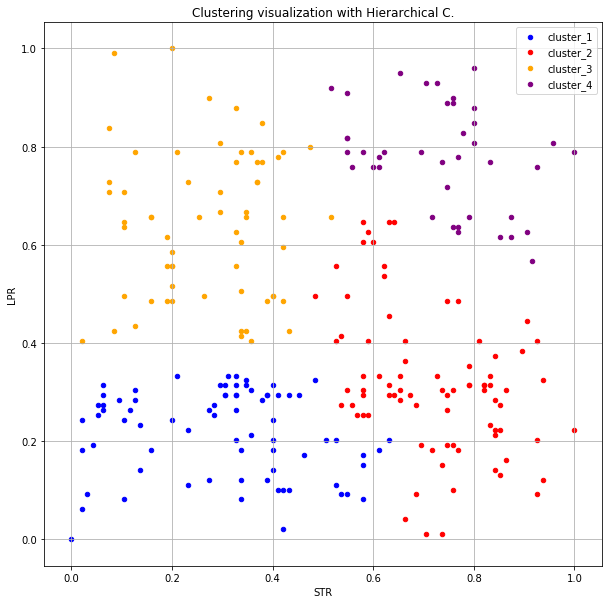

In [15]:
#15 สร้าง Clustering Visualization
x1 = data[y_hc==0][:,0]
y1 = data[y_hc==0][:,1]
x2 = data[y_hc==1][:,0]
y2 = data[y_hc==1][:,1]
x3 = data[y_hc==2][:,0]
y3 = data[y_hc==2][:,1]
x4 = data[y_hc==3][:,0]
y4 = data[y_hc==3][:,1]

plt.figure(figsize=(10,10))
plt.scatter(x1,y1, s=20, c='blue', label='cluster_1')
plt.scatter(x2,y2, s=20, c='red', label='cluster_2')
plt.scatter(x3,y3, s=20, c='orange', label='cluster_3')
plt.scatter(x4,y4, s=20, c='purple', label='cluster_4')
plt.title('Clustering visualization with Hierarchical C.')
plt.xlabel('STR')
plt.ylabel('LPR')
plt.legend()
plt.grid()